# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data=requests.get(btc_url).json()
btc_price=btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data=requests.get(eth_url).json()
eth_price=eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48165.60
The current value of your 5.3 ETH is $11857.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-01", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2024-01-24", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df


# Reorganize the DataFrame
# Separate ticker data
agg = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis = 1)
spy = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis = 1)


# Concatenate the ticker DataFrames
combined_df = pd.concat([agg, spy], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
combined_df.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2020-05-01 04:00:00+00:00  116.87  117.0998  116.6775       24394  116.97   
2020-05-04 04:00:00+00:00  116.97  117.0900  116.8700       15546  116.89   
2020-05-05 04:00:00+00:00  116.88  116.9700  116.8100       15147  116.96   
2020-05-06 04:00:00+00:00  116.41  116.7100  116.3000       20234  116.44   
2020-05-07 04:00:00+00:00  116.77  116.7700  116.4200       15964  116.61   

                                                   SPY                      \
                            volume        vwap   close      high       low   
timestamp                                                                    
2020-05-01 04:00:00+00:00  6331654  116.846992  282.83  290.6572  281.5200   
2020-05-04 04:00:00+00:00  3803239  116.960894  283.59  283.9000  279.1300   
2020-05-05 04:00:00+00:00  5593693  116.879703  286.15  289.2500  283.7134   
2020-05-06 04:00:00+00:00  7832788  116.423669  284.34  288.4600  283.7800   
2020-05-07 04:00:00+00:00  3914327  116.646007  287.70  289.7800  287.1300   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00      639155  285.31  127002350  284.074074  
2020-05-04 04:00:00+00:00      460683  280.74   81813464  281.785875  
2020-05-05 04:00:00+00:00      459766  286.64   80363726  287.388247  
2020-05-06 04:00:00+00:00      436221  288.04   74268760  286.080459  
2020-05-07 04:00:00+00:00      422689  287.75   75995625  287.986917

In [9]:
# Pick AGG and SPY close prices
agg_close_price = combined_df['AGG']['close'][-1]
spy_close_price = combined_df['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.74
Current SPY closing price: $485.39


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24269.50
The current value of your 200 AGG shares is $19548.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto, shares]}, index = ['crpyto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crpyto,60022.972
shares,43817.500


<Axes: ylabel='amount'>

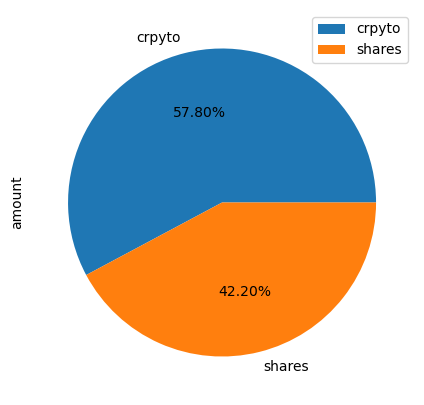

In [12]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', y = 'amount', figsize = (10, 5), autopct = '%1.2f%%')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum()['amount']

# Validate saving health
if savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif savings == emergency_fund:
    print('Congratulations! You are reaching the financial goal.')
else:
    print(f"There is ${emergency_fund - savings} away from reaching the goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker2 = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df


# Reorganize the DataFrame
# Separate ticker data
agg2 = df_ticker2[df_ticker2["symbol"] == "AGG"].drop("symbol", axis = 1)
spy2 = df_ticker2[df_ticker2["symbol"] == "SPY"].drop("symbol", axis = 1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg2, spy2], axis = 1, keys = ["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999731,0.978435,1.017120,0.999211,1.006223,1.002998,0.989938,0.998452,0.992939,0.995389,...,1.000463,1.002128,0.992979,1.009486,0.998234,0.994248,0.993805,0.987076,0.999671,1.005932
2,1.007173,0.971276,1.025273,1.014483,1.004076,1.006144,0.999426,0.990249,0.999792,1.003582,...,1.004941,0.999867,0.993192,1.004378,0.996460,0.997510,0.990992,1.001546,1.013907,1.008043
3,1.001981,0.977614,1.032762,1.012684,0.996240,1.010863,0.985466,0.983966,1.007533,1.019827,...,1.000646,0.999640,0.994391,1.009277,0.999020,1.013518,0.977891,0.995685,1.014556,0.991601
4,1.006481,0.984900,1.031749,1.012948,0.995743,1.022107,0.992463,0.990538,1.006188,1.017615,...,0.999714,1.010611,0.992720,1.006013,1.004464,1.017873,0.977391,0.998852,1.007689,0.990804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,30.872211,6.657716,11.280658,7.451168,26.124172,1.385672,8.341516,38.553556,24.058854,13.010831,...,19.321848,15.626399,9.331419,20.241312,12.007812,10.850068,12.989089,8.288250,2.682412,11.539392
7557,31.347431,6.614661,11.413754,7.468523,26.174402,1.404226,8.419535,38.126642,24.065987,13.067768,...,19.541876,15.664788,9.340349,20.277093,12.032509,10.881535,12.939887,8.325263,2.666010,11.520803
7558,31.410790,6.645669,11.409835,7.489355,26.391108,1.411192,8.370908,37.926289,24.361750,13.242730,...,19.480405,15.710857,9.369043,20.182325,12.100852,11.083589,12.912651,8.283359,2.688156,11.442078
7559,31.741058,6.716044,11.438339,7.524414,26.598704,1.401148,8.391354,37.796899,24.223469,13.399733,...,19.469866,15.768365,9.389652,20.322477,12.242142,11.062797,12.841993,8.336328,2.691439,11.388589


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

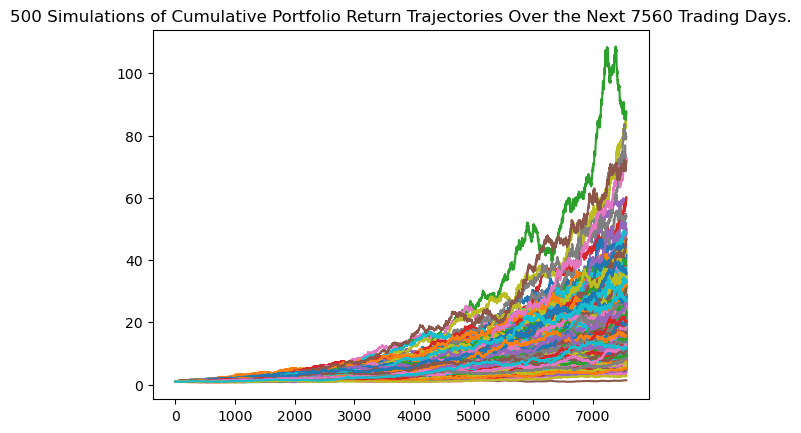

In [19]:
# Plot simulation outcomes
MC_thirty_years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

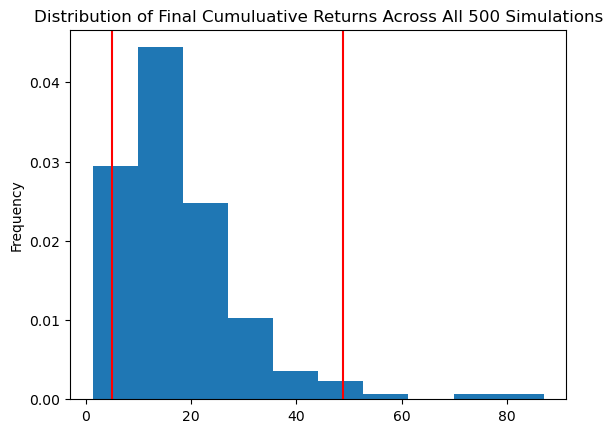

In [20]:
# Plot probability distribution and confidence intervals
MC_thirty_years.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_years.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean             17.873989
std              12.031488
min               1.379787
25%               9.902622
50%              14.837108
75%              22.610518
max              86.932419
95% CI Lower      5.053011
95% CI Upper     48.759622
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $101060.22 and $975192.44


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $151590.32 and $1462788.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4,0.6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006822,1.002995,0.997123,1.000110,1.008305,1.003123,1.004241,0.993239,0.995115,0.986705,...,0.998075,0.995579,0.997189,0.986871,0.999507,0.996862,1.002037,0.997825,0.992931,1.008824
2,1.003151,0.995490,1.008118,1.003191,1.015161,1.001403,1.004900,0.990430,0.986447,0.986279,...,1.010636,0.994122,1.004052,0.969483,1.003124,1.010491,1.007983,1.008446,1.004625,1.006402
3,0.995638,0.980371,1.006088,1.001749,1.010074,1.010991,1.000184,0.993961,0.986747,0.982542,...,1.010414,1.006767,0.998840,0.976457,1.006260,1.003463,1.004106,1.013159,1.004574,1.008688
4,0.999573,0.974857,1.011009,1.009342,1.010681,1.007000,0.994995,0.987485,0.978232,0.982670,...,0.998142,1.000335,1.009369,0.978635,1.008007,1.009003,1.015921,1.004436,1.000242,1.023877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.434122,1.433342,2.397403,1.678587,2.509552,1.391442,0.698414,1.370356,1.366377,1.812376,...,1.983900,1.640116,1.741143,2.018672,1.127335,1.775712,1.593331,1.846904,1.820212,1.998818
1257,1.422976,1.460513,2.414443,1.666679,2.506587,1.387948,0.692929,1.379762,1.370987,1.801562,...,1.984207,1.651542,1.753616,2.017052,1.123488,1.773113,1.595121,1.845781,1.837923,2.011110
1258,1.421702,1.458690,2.389999,1.692996,2.513618,1.387174,0.696017,1.388828,1.364105,1.812749,...,1.980013,1.638089,1.741068,2.002340,1.117527,1.783417,1.607349,1.861987,1.838918,2.018189
1259,1.418272,1.458339,2.359631,1.683043,2.500674,1.385421,0.699719,1.385584,1.378915,1.789599,...,1.957114,1.639779,1.751640,2.015378,1.117591,1.776128,1.633713,1.889330,1.871709,2.010442


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

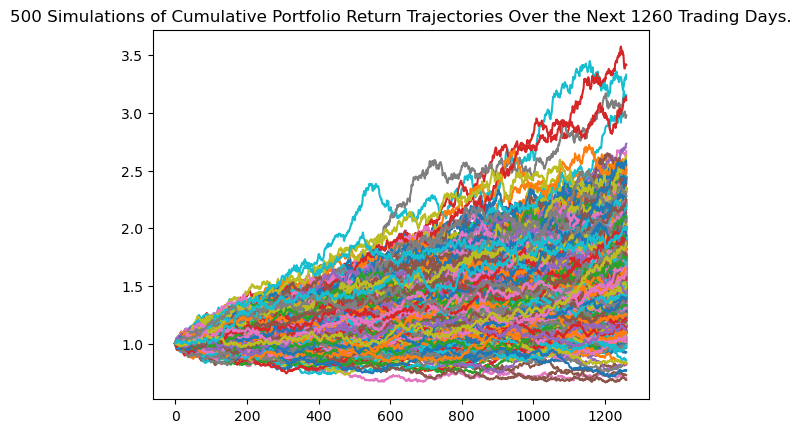

In [26]:
# Plot simulation outcomes
MC_five_years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

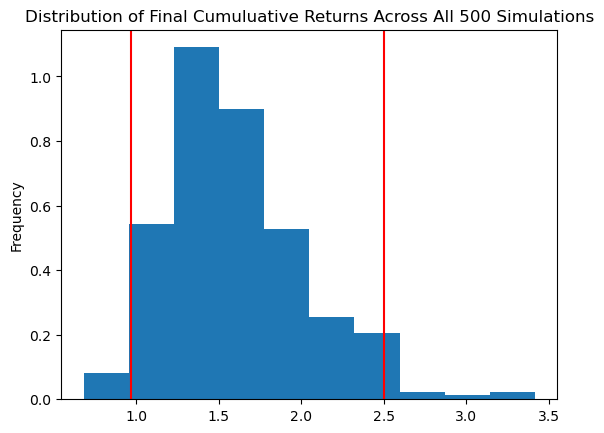

In [27]:
# Plot probability distribution and confidence intervals
MC_five_years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.603704
std               0.421457
min               0.683828
25%               1.300606
50%               1.549643
75%               1.840191
max               3.416917
95% CI Lower      0.966019
95% CI Upper      2.502472
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8] * initial_investment, 2)
ci_upper_five = round(tbl_5[9] * initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57961.14 and $150148.33


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993300,0.995482,1.012695,1.002584,0.996998,1.006785,0.998925,1.000480,1.008819,0.998511,...,1.008102,1.002211,1.011759,1.002051,1.017821,1.004170,1.007553,1.000613,1.009670,1.006490
2,0.997523,0.994102,1.006141,1.010293,1.003240,0.998134,1.001569,1.002476,0.993692,0.994048,...,1.008292,1.002635,1.006212,1.008108,1.005140,1.003839,1.005404,1.007234,1.017375,1.015585
3,0.996788,0.985893,1.012952,1.006493,1.004597,1.006813,1.008120,0.991321,0.992461,1.006330,...,1.006886,1.010103,1.005873,1.013145,0.996037,1.015180,1.001796,1.008601,1.029946,1.016596
4,0.998561,0.984086,1.015668,1.010156,1.009135,1.020945,1.010409,0.997049,0.992852,1.005600,...,1.016538,1.004082,0.997121,1.013842,0.993258,1.023558,1.004486,1.016155,1.042047,1.027644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.292674,2.274717,3.411199,4.451748,2.364136,1.947396,3.236493,1.731637,5.394035,3.695057,...,2.795410,3.873993,2.349208,3.166796,4.101358,2.054651,3.816934,2.339323,2.306053,2.963878
2517,1.278614,2.276930,3.407842,4.480881,2.384564,1.943219,3.211564,1.731022,5.316613,3.718045,...,2.784771,3.843164,2.367447,3.196136,4.096033,2.073620,3.832323,2.331241,2.290748,2.956920
2518,1.284456,2.289894,3.404003,4.429259,2.392909,1.922114,3.206655,1.731597,5.293881,3.734647,...,2.778610,3.839820,2.353265,3.201997,4.100898,2.049714,3.830360,2.339395,2.303858,2.938420
2519,1.265293,2.300545,3.390941,4.488433,2.380820,1.930222,3.253664,1.719905,5.303833,3.701229,...,2.759966,3.803983,2.378702,3.209406,4.059873,2.046438,3.817153,2.323682,2.298274,2.940971


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

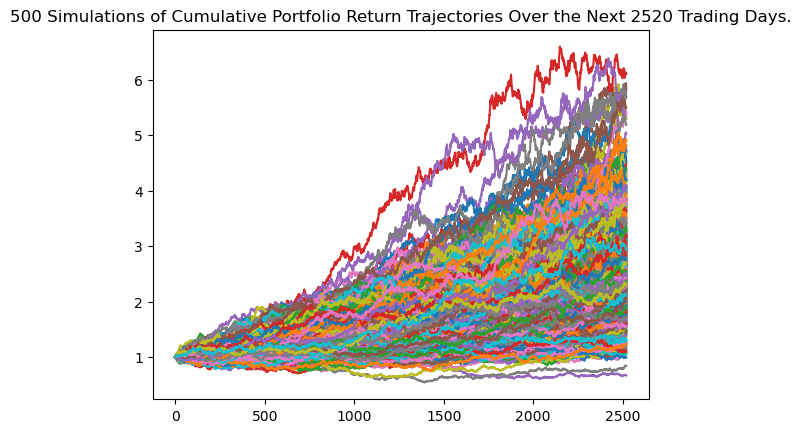

In [32]:
# Plot simulation outcomes
MC_ten_years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

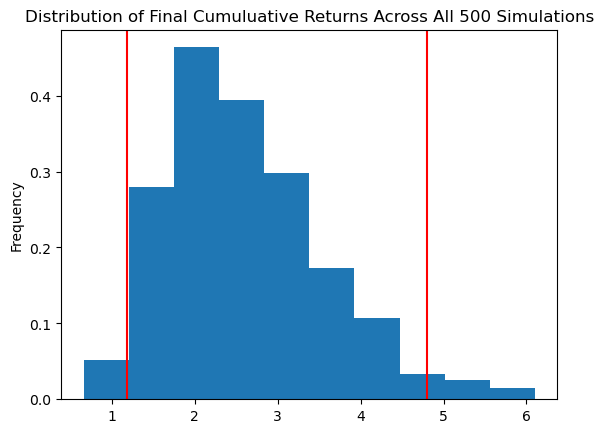

In [33]:
# Plot probability distribution and confidence intervals
MC_ten_years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

count           500.000000
mean              2.612250
std               0.944936
min               0.667051
25%               1.949061
50%               2.419021
75%               3.117742
max               6.100786
95% CI Lower      1.182171
95% CI Upper      4.802907
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8] * initial_investment, 2)
ci_upper_ten = round(tbl_10[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70930.23 and $288174.43
